In [89]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
from keras.models import load_model

from sklearn.metrics import accuracy_score

%matplotlib inline

In [49]:
grid_df = pd.read_pickle('./model_data/grid_{}.pkl'.format('04'))

In [76]:
df_32 = grid_df.loc[grid_df["batch_size"]==32]
histories = iter(df_32.fit_out.reset_index(drop=True))
a = 0

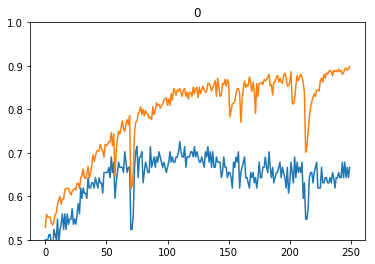

In [77]:
history = next(histories)

y_val = history.history['val_acc']
y_train = history.history['acc']

plt.plot(y_val)
plt.plot(y_train)
plt.ylim(0.5,1)
plt.title(a)
a = a+1

In [84]:
best_bodel_path = grid_df.loc[grid_df["batch_size"]==32].reset_index(drop=True).loc[2]['best_model_path']

In [95]:
best_model = load_model('./models/04/best_model_04_6.pkl')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [ ]:
best_model.